In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV , cross_validate, KFold
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression ,ridge_regression, lasso_path, LogisticRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, mean_squared_log_error, mean_absolute_percentage_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier ,DecisionTreeRegressor
from sklearn.model_selection import train_test_split ,cross_validate, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_score
from category_encoders import BinaryEncoder
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.metrics import f1_score, precision_score, recall_score, ConfusionMatrixDisplay, classification_report, PrecisionRecallDisplay,roc_auc_score,accuracy_score, make_scorer, precision_recall_curve, make_scorer

import warnings
warnings.filterwarnings('ignore')

**<h1>Bike Sharing<h1>**
==

## **Context**<br>
Bike-sharing systems are a new generation of traditional bike rentals where the whole process, from membership, rental, and return back, has become automatic. Through these systems, a user can easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousand bicycles. Today, great interest exists in these systems due to their important role in traffic, environmental, and health issues.
Apart from interesting real-world applications of bike-sharing systems, the characteristics of data generated by these systems make them attractive for research. Unlike other transport services such as buses or subways, the duration of travel, departure, and arrival position is explicitly recorded in these systems. This feature turns the bike-sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that the most important events in the city could be detected by monitoring these data.<br>

### **Business Problem**
How much bikes that must be provided by the rental company? <br>
This must be solved so the rental company is having enough bike to be rent. <br>
Also if it's not solved, there might be stock shortage of bike to be rent.

### **Business Task**
To predict the number of bikes that must be provided by the rental company. So we use model(regression) to predict the number of bikes.<br>

### **Metric Evaluation**
Mean Absolute Error : To Predict Absolute Value of Error that the rental company need to adjust.

### **Project Limitations**
The moodel only can predicting amount of rent bike with total less than 970. So above that, the model can't predicting it.<br>

## **Available Data**
From https://capitalbikeshare.com/system-data /  data_bike_sharing.csv file, and here the dictionary:<br>

### **Features**
- dteday: date
- season: season (1: winter, 2: spring, 3: summer, 4: fall)
- hr: hour (0 to 23)
- holiday: holiday or not
- temp: normalized temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-16, t_max=+50 (only in hourly scale)
- hum: normalized humidity. The values are divided into 100 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered
- weathersit:
    1. Clear, Few clouds, Partly cloudy, Partly cloudy
    2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


# Data Understanding

- Capital Bikeshare is bikesharing program by The District Department of Transportation (DDOT)’s America. They have partnership with Arlington County, the City of Alexandria, Montgomery County, Fairfax County, Prince George's County, and the City of Falls Church.<br>
- With Capital Bikeshare we can take a bicycle from more than 700 stations across the Washington, DC, metro region and return it to any station near our destination. Check out a bike for our trip to work, Metro, run errands, go shopping, or visit friends and family.<br>
- Capital Bikeshare is also the successor to DDOT's first bikesharing system called Smartbike DC, which launched in August 2008 with ten stations and 100 bikes.<br>
- DDOT updated its plan for the District’s portion of the Capital Bikeshare system in 2020. This plan was drafted to create goals for the program, describe measures that track progress toward goal achievement, analyze how well the system is performing, generate system expansion scenarios and financial forecasts for the near term, and recommend an expansion strategy for the next six years that best meets the goals and addresses system performance gaps.

---

# EDA

In [3]:
df0 = pd.read_csv('data_bike_sharing.csv')
df0

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857
...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,0.75,1,0,1,0.2273,0.24,7,14,243,257
12161,2012-07-06,0.62,1,0,3,0.7424,0.78,0,39,63,102
12162,2012-02-20,0.60,2,1,1,0.2121,0.24,5,0,6,6
12163,2012-03-31,0.77,2,0,2,0.4242,0.42,2,14,55,69


In [4]:
df0.dtypes

dteday         object
hum           float64
weathersit      int64
holiday         int64
season          int64
atemp         float64
temp          float64
hr              int64
casual          int64
registered      int64
cnt             int64
dtype: object

First of all, like always, we need to check all the dtypes for each columns, is there need to be change as or we need to keep it as it is.
And we found that dteday not in actual form and that is `datetime`. So we gonna change it to datetime.

Change `dteday` columns from object into datetime so we can extract/add more new features from `dteday`

Adding new feature such as: `year, month, day(day of month), day of week, and day of year`. This new features will be increasing our model to get good performances.

In [5]:
df0['dteday'] = pd.to_datetime(df0['dteday'])

In [6]:
df0['year'] = df0['dteday'].dt.year
df0['month'] = df0['dteday'].dt.month
df0['day'] = df0['dteday'].dt.day
df0['day_W'] = df0['dteday'].dt.day_of_week
df0['day_Y'] = df0['dteday'].dt.day_of_year

In [7]:
df = df0

In [8]:
df.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt,year,month,day,day_W,day_Y
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250,2011,12,9,4,343
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18,2012,6,17,6,169
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107,2011,6,15,2,166
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145,2012,3,31,5,91
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857,2012,7,31,1,213


In [9]:
df.describe()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt,year,month,day,day_W,day_Y
count,12165,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,2012-01-01 02:04:45.869297408,0.625451,1.416934,0.029758,2.488615,0.476996,0.498185,11.519770,35.834443,153.436580,189.271023,2011.501932,6.510974,15.642828,3.005261,182.881545
min,2011-01-01 00:00:00,0.000000,1.000000,0.000000,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000,1.000000
25%,2011-07-02 00:00:00,0.470000,1.000000,0.000000,2.000000,0.333300,0.340000,6.000000,4.000000,34.000000,40.000000,2011.000000,4.000000,8.000000,1.000000,93.000000
50%,2012-01-02 00:00:00,0.620000,1.000000,0.000000,2.000000,0.484800,0.500000,12.000000,17.000000,115.000000,142.000000,2012.000000,7.000000,16.000000,3.000000,183.000000
75%,2012-07-03 00:00:00,0.780000,2.000000,0.000000,3.000000,0.621200,0.660000,18.000000,49.000000,220.000000,282.000000,2012.000000,9.000000,23.000000,5.000000,273.000000
max,2012-12-31 00:00:00,1.000000,4.000000,1.000000,4.000000,1.000000,1.000000,23.000000,362.000000,876.000000,970.000000,2012.000000,12.000000,31.000000,6.000000,366.000000
std,NaN,0.192102,0.635937,0.169925,1.106157,0.171857,0.192492,6.931872,49.489286,151.046123,181.223903,0.500017,3.433995,8.805860,1.992993,105.102742


Looking Demograph member of Rental Bikes<br>
We found out that is more registered member than casual member.

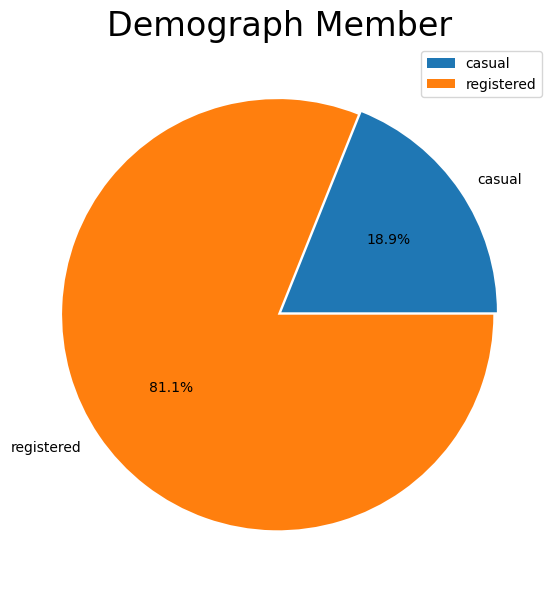

In [10]:
plt.figure(figsize=(14,7))

plt.pie(x=[df['casual'].sum(),df['registered'].sum()],
        labels=["casual","registered"],
        autopct=f'%.1f%%',
        explode=(.01,.01))

plt.title("Demograph Member",fontsize=24)
plt.legend(["casual","registered"]);

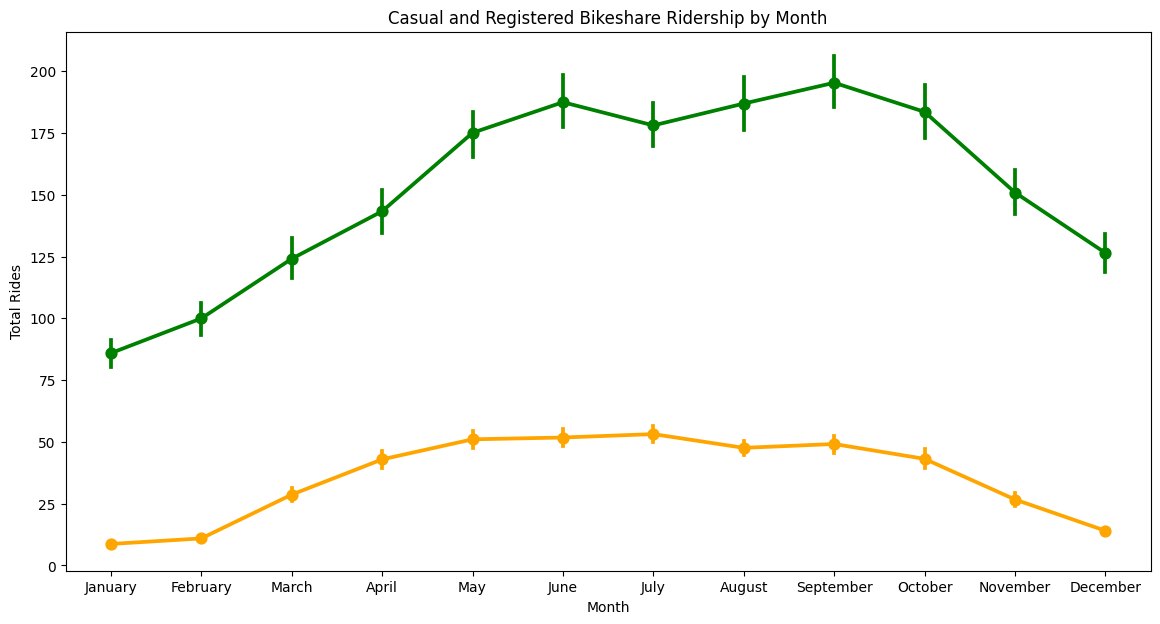

In [11]:
plt.figure(figsize=(14,7))

sns.pointplot(data=df[['month', 'casual', 'registered']],
              x='month',
              y='casual',

              color='orange')

sns.pointplot(data=df[['month', 'casual', 'registered']],
              x='month',
              y='registered',

              color='green')

tick_val=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
tick_lab=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(tick_val, tick_lab,fontsize=10)

plt.title('Casual and Registered Bikeshare Ridership by Month')
plt.ylabel('Total Rides')
plt.xlabel('Month');

Looking all rents from each category/features that available in the datasets.

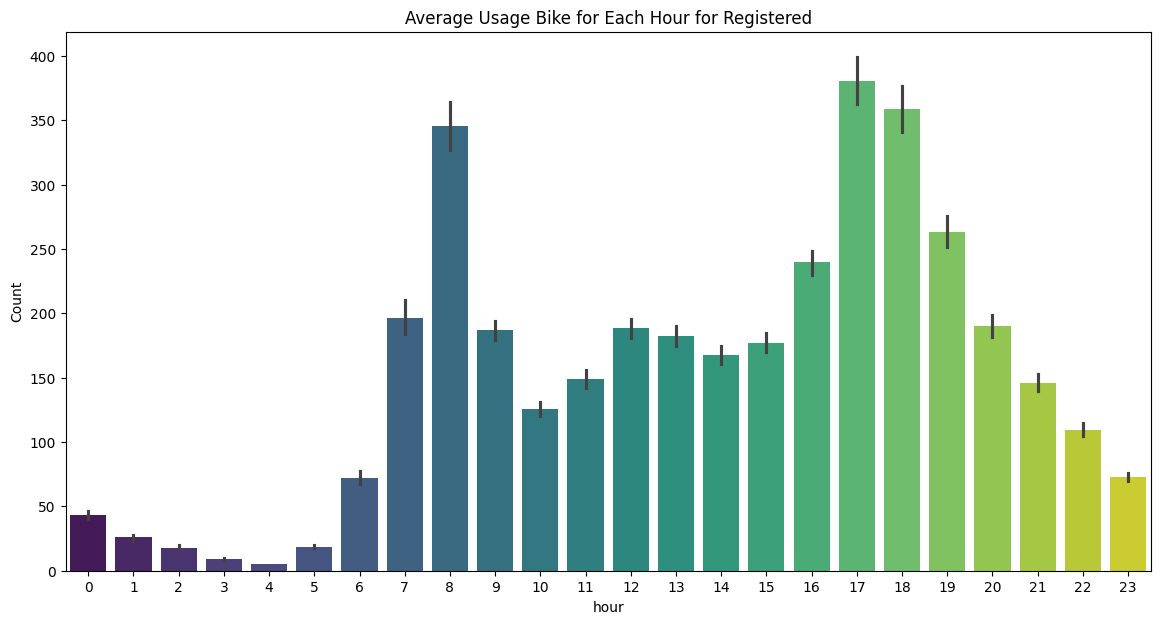

In [12]:
hr_bike = df.groupby('hr')['registered'].mean().reset_index()

plt.figure(figsize=(14,7))

sns.barplot(data = df, x='hr',y='registered',palette='viridis')
plt.title('Average Usage Bike for Each Hour for Registered')
plt.ylabel('Count')
plt.xlabel('hour');

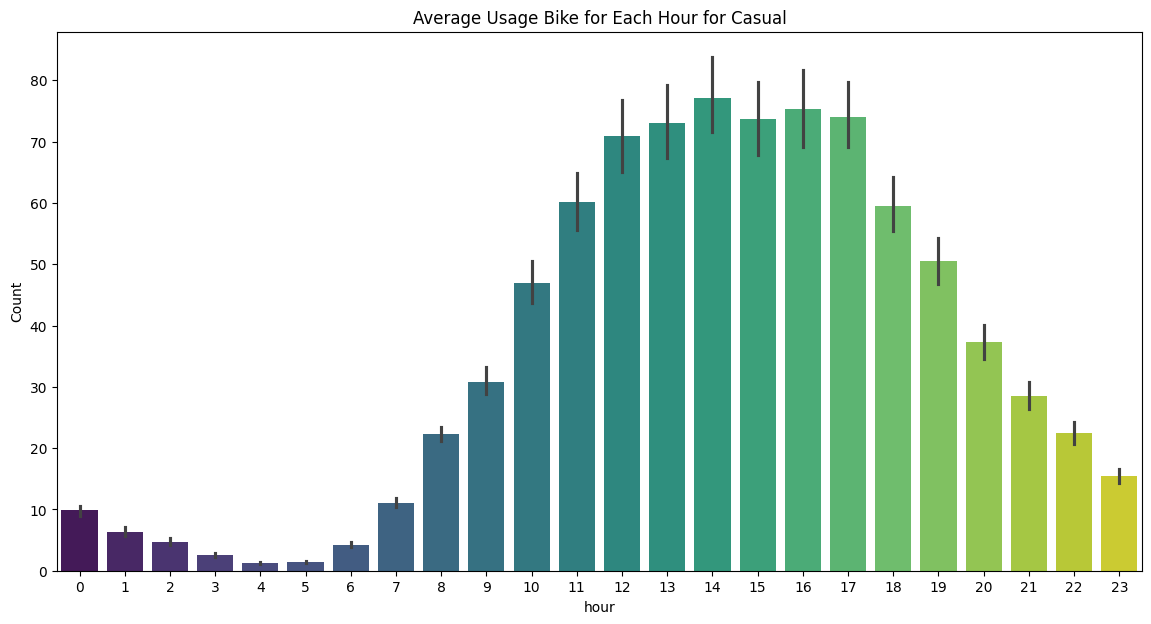

In [13]:
hr_bike = df.groupby('hr')['casual'].mean().reset_index()

plt.figure(figsize=(14,7))

sns.barplot(data = df, x='hr',y='casual',palette='viridis')
plt.title('Average Usage Bike for Each Hour for Casual')
plt.ylabel('Count')
plt.xlabel('hour');

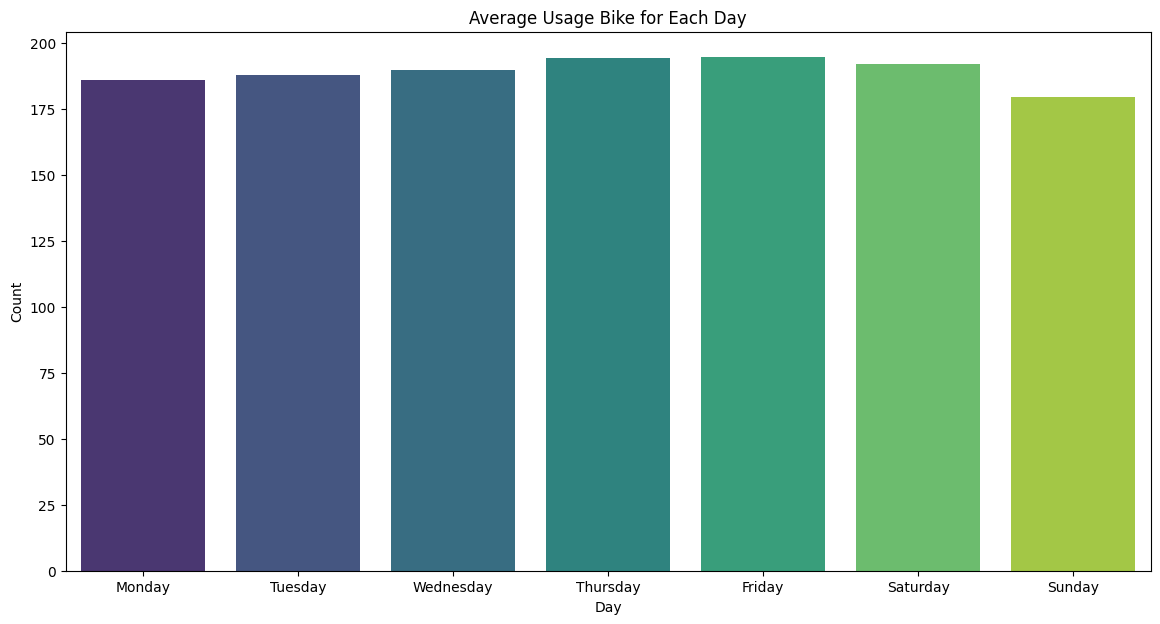

In [14]:
day_bike = df.groupby('day_W')['cnt'].mean().reset_index()

plt.figure(figsize=(14,7))

sns.barplot(data = day_bike, x='day_W',y='cnt',palette='viridis')
plt.title('Average Usage Bike for Each Day')
plt.ylabel('Count')
plt.xlabel('Day')

tick_val=[0, 1, 2, 3, 4, 5, 6]
tick_lab=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(tick_val, tick_lab);

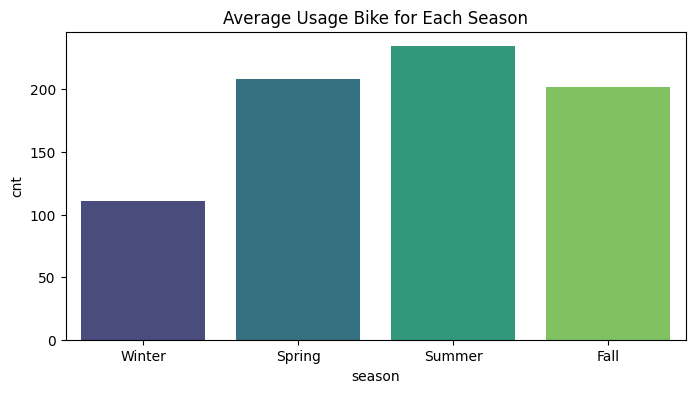

In [15]:
seasonal_bike = df.groupby('season')['cnt'].mean().reset_index()

plt.figure(figsize=(8,4))

sns.barplot(data = seasonal_bike, x='season',y='cnt',palette='viridis')
plt.title('Average Usage Bike for Each Season')

tick_val=[0, 1, 2, 3]
tick_lab=['Winter', 'Spring', 'Summer', 'Fall']
plt.xticks(tick_val, tick_lab);

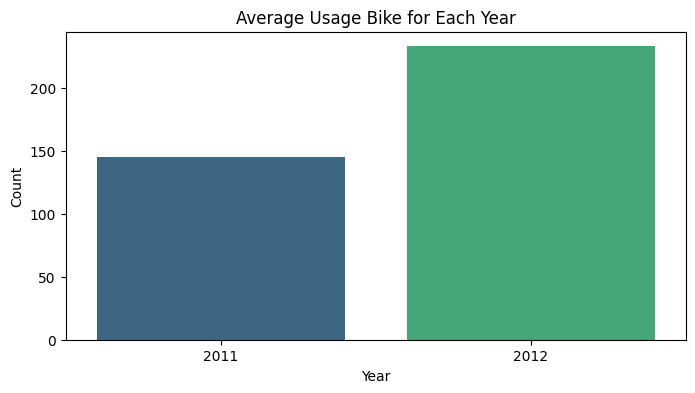

In [16]:
year_bike = df.groupby('year')['cnt'].mean().reset_index()

plt.figure(figsize=(8,4))

sns.barplot(data = year_bike, x='year',y='cnt',palette='viridis')
plt.title('Average Usage Bike for Each Year')
plt.ylabel('Count')
plt.xlabel('Year');

We also want to see correlation about in for each columns using `main features` that haven't been extract yet.

In [95]:
df

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt,year,month,day,day_W,day_Y
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250,2011,12,9,4,343
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18,2012,6,17,6,169
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107,2011,6,15,2,166
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145,2012,3,31,5,91
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857,2012,7,31,1,213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,0.75,1,0,1,0.2273,0.24,7,14,243,257,2012,1,25,2,25
12161,2012-07-06,0.62,1,0,3,0.7424,0.78,0,39,63,102,2012,7,6,4,188
12162,2012-02-20,0.60,2,1,1,0.2121,0.24,5,0,6,6,2012,2,20,0,51
12163,2012-03-31,0.77,2,0,2,0.4242,0.42,2,14,55,69,2012,3,31,5,91


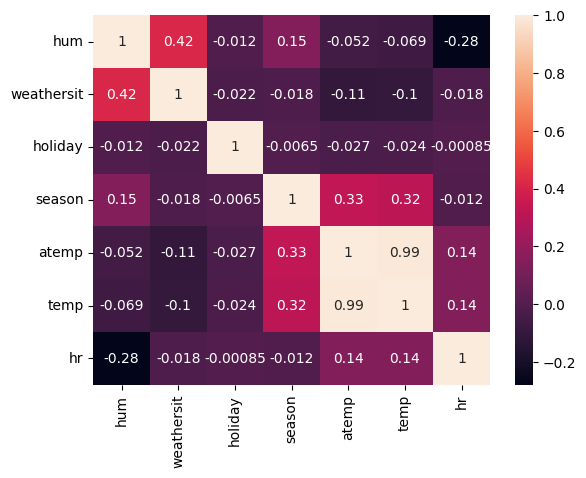

In [99]:
sns.heatmap(df[['hum','weathersit','holiday','season','atemp','temp','hr']].corr(), annot=True);

# CHECK OUTLIER IN TARGET

There was outlier in the data['cnt'] for 2.7%. And most of them from season 3 (`Summer`) and 2 (`Spring`). And we will keep this outlier, because of domain knowledge that we know people `more` often cycling in those seasons. This also keeping our model to can predict in those seasons too with the trade off of smaller error in those area.

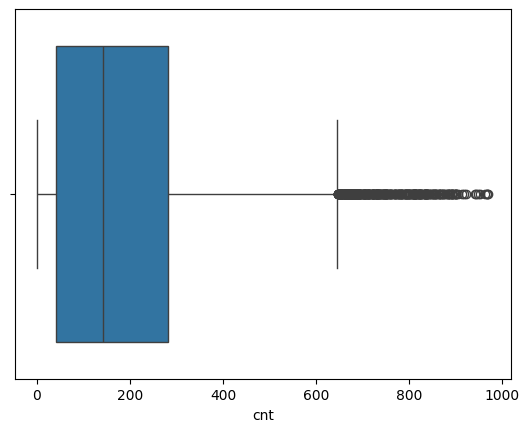

In [17]:
sns.boxplot(x=df['cnt']);

In [107]:
# Using IQR above, because we know that there's only outlier from above
iqr = df['cnt'].quantile(.75)-df['cnt'].quantile(.25)
above = df['cnt'].quantile(.75)+ (1.5*iqr)

print("Outlier in our data is: ",(len(df[(df['cnt']>= above)])/len(df))*100)

Outlier in our data is:  2.794903411426223


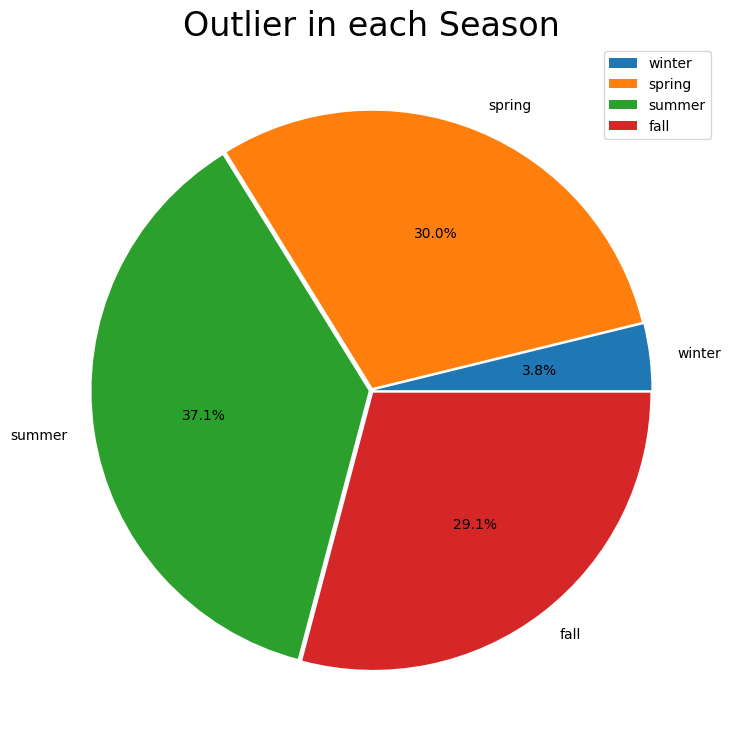

In [19]:
outlier = df[(df['cnt']>= above)]
plt.figure(figsize=(9,9))

plt.pie(x=outlier.groupby('season')['cnt'].count(),
        labels=["winter","spring","summer","fall"],
        autopct=f'%.1f%%',
        explode=(.01,.01,.01,.01))

plt.title("Outlier in each Season",fontsize=24)
plt.legend(["winter","spring","summer","fall"]);

From distplot too, the data looks skew and we know the df['cnt'] doesn't distribute normal. Here we can choose our scaller in feature enginering more easily and maybe we can assume that the best score for scoring is with Robust scaller.

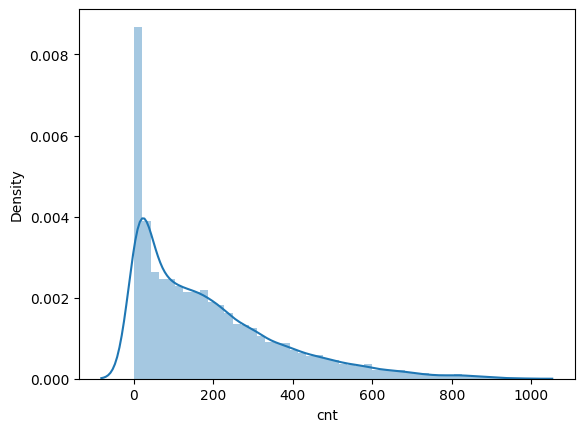

In [20]:
# Checking skewness the target
sns.distplot(df['cnt']);

---

**<h1>Feature Engineering<h1>**
==

# SPLITTING TRAIN AND TEST + DETERMINE FEATURES & TARGETS

In [21]:
df.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt,year,month,day,day_W,day_Y
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250,2011,12,9,4,343
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18,2012,6,17,6,169
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107,2011,6,15,2,166
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145,2012,3,31,5,91
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857,2012,7,31,1,213


In [22]:
train,test = train_test_split(df,test_size=.2,random_state=48)

The reason we use train-test split with a test size of 0.2 is to allocate 20% of the dataset for testing and 80% for training, which is a common practice in machine learning. This split allows for the model to be trained on a larger portion of the data while still retaining a substantial amount for testing the models performance.

In here, we make 3 targets,  with 1(`cnt`) is primary target and 2(`casual` and `registered`) is secondary target. The secondary target if we sum is the result of primary target(`cnt`)

In [23]:
# train
x_train = train.drop(columns=['dteday','casual','registered','cnt'])
y_casual_train = train['casual']
y_registered_train = train['registered']
y_cnt_train = train['cnt']

In [24]:
# test
x_test = test.drop(columns=['dteday','casual','registered','cnt'])
y_casual_test = test['casual']
y_registered_test = test['registered']
y_cnt_test = test['cnt']

## COLUMNTRANSFORMER

We make column transformer. This is preprocessing proccess that make our data turn itu value that we want or understand by computer. Because our data all numeric, we don't need to encode anything. But, like the first we talk about, we need to scale the data so it can make good performance in our model.<br>
**NOTE**: In data there's also data that already scaled, but we want to scale once again so have same scaler for each columns. That's why we use all columns.

In [25]:
kolom = ColumnTransformer(transformers=[
    ('scale',RobustScaler(),x_train.columns)
])

In [26]:
kolom.fit(x_train)

ColumnTransformer(transformers=[('scale', RobustScaler(),
                                 Index(['hum', 'weathersit', 'holiday', 'season', 'atemp', 'temp', 'hr', 'year',
       'month', 'day', 'day_W', 'day_Y'],
      dtype='object'))])

In [27]:
# Initiate model

linreg = LinearRegression()
ridge = Ridge(random_state=48)
lasso = Lasso(random_state=48)
svr = SVR()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=48)
xg = XGBRegressor(random_state=48)
rf = RandomForestRegressor(random_state=48)

# BENCHMARK ALL

In [28]:
# Benchmarking for find best model and also best scaller that we can use to prediction and we can tune it later

list_models = [linreg,ridge,lasso,svr,knn,dt,xg,rf]
scaler = [RobustScaler(),MinMaxScaler(),StandardScaler()]

pipa = Pipeline([
    ('trf',kolom),
    ('reg',None)

])

model_search = {
    'reg':list_models,
    'trf__scale':scaler

}

grd = GridSearchCV(
    estimator=pipa,
    param_grid=model_search,
    scoring=['neg_mean_absolute_error','neg_root_mean_squared_error',\
             'neg_mean_absolute_percentage_error','neg_mean_squared_error'],
    verbose=3,
    cv=StratifiedKFold(),
    return_train_score=True,
    refit='neg_mean_absolute_error',
    n_jobs=-1
)
grd.fit(x_train,y_cnt_train)
grd.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[CV 1/5] END reg=LinearRegression(), trf__scale=RobustScaler(); neg_mean_absolute_error: (train=-106.164, test=-106.651) neg_mean_absolute_percentage_error: (train=-3.284, test=-3.447) neg_mean_squared_error: (train=-20209.351, test=-20099.056) neg_root_mean_squared_error: (train=-142.160, test=-141.771) total time=   0.0s
[CV 3/5] END reg=LinearRegression(), trf__scale=RobustScaler(); neg_mean_absolute_error: (train=-106.113, test=-106.298) neg_mean_absolute_percentage_error: (train=-3.283, test=-3.246) neg_mean_squared_error: (train=-20237.732, test=-19983.493) neg_root_mean_squared_error: (train=-142.259, test=-141.363) total time=   0.0s
[CV 2/5] END reg=LinearRegression(), trf__scale=RobustScaler(); neg_mean_absolute_error: (train=-106.104, test=-107.054) neg_mean_absolute_percentage_error: (train=-3.334, test=-3.223) neg_mean_squared_error: (train=-19969.749, test=-21051.658) neg_root_mean_squared_error: (train=-141.314, test=-145.092) total time=   0.0s
[CV 2/5] END reg=LinearRe

{'reg': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=48, ...),
 'trf__scale': RobustScaler()}

In [29]:
pd.DataFrame(grd.cv_results_)[['param_reg','params','mean_fit_time','param_trf__scale',\
                                'rank_test_neg_mean_absolute_error','mean_test_neg_mean_absolute_error','mean_train_neg_mean_absolute_error',\
                               'mean_test_neg_root_mean_squared_error','mean_test_neg_mean_squared_error',\
                                'mean_test_neg_mean_absolute_percentage_error','std_test_neg_mean_absolute_error']].sort_values('rank_test_neg_mean_absolute_error').head(9)

,param_reg,params,mean_fit_time,param_trf__scale,rank_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,mean_train_neg_mean_absolute_error,mean_test_neg_root_mean_squared_error,mean_test_neg_mean_squared_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_error
20,"XGBRegressor(base_score=None, booster=None, ca...","{'reg': XGBRegressor(base_score=None, booster=...",0.232272,StandardScaler(),1,-26.389149,-14.946297,-41.821764,-1753.414308,-0.429907,0.896245
19,"XGBRegressor(base_score=None, booster=None, ca...","{'reg': XGBRegressor(base_score=None, booster=...",0.214886,MinMaxScaler(),1,-26.389149,-14.946297,-41.821764,-1753.414308,-0.429907,0.896245
18,"XGBRegressor(base_score=None, booster=None, ca...","{'reg': XGBRegressor(base_score=None, booster=...",0.259684,RobustScaler(),1,-26.389149,-14.946297,-41.821764,-1753.414308,-0.429907,0.896245
23,RandomForestRegressor(random_state=48),{'reg': RandomForestRegressor(random_state=48)...,4.999576,StandardScaler(),4,-27.938527,-10.440803,-45.590457,-2085.381698,-0.342677,1.126557
21,RandomForestRegressor(random_state=48),{'reg': RandomForestRegressor(random_state=48)...,5.606928,RobustScaler(),5,-27.938965,-10.448200,-45.512438,-2078.163726,-0.342986,1.101344
22,RandomForestRegressor(random_state=48),{'reg': RandomForestRegressor(random_state=48)...,5.352851,MinMaxScaler(),6,-27.953850,-10.444734,-45.577741,-2084.053301,-0.343509,1.094467
16,DecisionTreeRegressor(random_state=48),{'reg': DecisionTreeRegressor(random_state=48)...,0.102149,MinMaxScaler(),7,-37.299998,0.000000,-63.126593,-3991.099466,-0.411698,1.082608
15,DecisionTreeRegressor(random_state=48),{'reg': DecisionTreeRegressor(random_state=48)...,0.106804,RobustScaler(),8,-37.361042,0.000000,-63.073354,-3985.982002,-0.411047,1.204979
17,DecisionTreeRegressor(random_state=48),{'reg': DecisionTreeRegressor(random_state=48)...,0.102372,StandardScaler(),9,-37.398029,0.000000,-63.297513,-4014.881979,-0.411197,1.230849


### Benchmark grd evaluation

From 8 model that we tried, we see that `XGBRegressor` is the best if we see from ranking in `Mean Abosolute Error`. <br>
With different scalling too, XGBRegressor is doing great or same than the other model. From stability model, from `std` standpoint, `XGBRegressor` also is the best.<br>
And here, the summary of MAE and std from the top 3 Models.
1. XGBRegressor             : 26.389149 , std: 0.896245
2. RandomForestRegressor    : 27.938527 , std: 1.126557
3. DecisionTreeRegressor    : 37.299998 , std: 1.082608

Another reason we use XGBRegressor because it is known for its high accuracy and ability to handle complex relationships between variable and also advanced regularization techniques that help prevent overfitting and improve generalization performance. <br>

The Next we gonna do is:
- Making Prediction with XGBRegressor model without `tuning`
- `Tunning` XGBRegressor model

In [30]:
xgb1st = grd.best_estimator_
xgb1st

Pipeline(steps=[('trf',
                 ColumnTransformer(transformers=[('scale', RobustScaler(),
                                                  Index(['hum', 'weathersit', 'holiday', 'season', 'atemp', 'temp', 'hr', 'year',
       'month', 'day', 'day_W', 'day_Y'],
      dtype='object'))])),
                ('reg',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=48, ...))])

---

# **Prediction & Tunning**

## PREDICT without TUNNING

### Predict MAE from Target **cnt** -> stand alone

In [31]:
xg_= {
    'xgb_before_tune': XGBRegressor(random_state=48)
}

model = xgb1st.fit(x_train, y_cnt_train)
y_pred = model.predict(x_test)
score_mae = (mean_absolute_error(y_cnt_test, y_pred))
score_mape = (mean_absolute_percentage_error(y_cnt_test, y_pred))
score_rmse = (np.sqrt(mean_squared_error(y_cnt_test, y_pred)))

score_before_tunning = pd.DataFrame({'MAE': score_mae,'MAPE':score_mape,'RMSE': score_rmse},\
                                index=xg_.keys())

score_before_tunning

,MAE,MAPE,RMSE
xgb_before_tune,25.337136,0.414981,40.781515


From the start, we also have another target that is `casual` & `registered` that if we summing up it will be `cnt`. We combine these 2 target to find cnt numbers

### Predict MAE from Target **cnt** from MAE **combine** `casual` and `registered` -> combine target

In [32]:
pipas_casual= xgb1st.fit(x_train,y_casual_train)
y_casual_pred = pipas_casual.predict(x_test)

#================================================================#

pipas_registered= xgb1st.fit(x_train,y_registered_train)
y_registered_pred = pipas_registered.predict(x_test)

#================================================================#

#================================================================#

xgb_combine = {
    'xgb_before_tune_combine': XGBRegressor(random_state=48)
}

y_combine_pred = y_casual_pred + y_registered_pred
score_mae = mean_absolute_error(y_cnt_test,y_combine_pred)
score_mape = mean_absolute_percentage_error(y_cnt_test,y_combine_pred)
score_rmse = mean_squared_error(y_cnt_test,y_combine_pred,squared=False)

score_combine_before_tunning = pd.DataFrame({'MAE': score_mae, 'MAPE': score_mape, 'RMSE': score_rmse},\
                                            index=xgb_combine.keys())
score_combine_before_tunning

,MAE,MAPE,RMSE
xgb_before_tune_combine,25.137225,0.406002,39.705668


From here we know that Combine Target is more accurate than stand Alone target, so from here we gonna hyperparameter tunning it.

## Hyperparameter Tunning

In [33]:
# Params in XGB

max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Tree Amount
n_estimators = list(np.arange(100, 201))

# Subsample ratio of the training instances (% from total rows train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # The larger gamma is the more conservative the algorithm will be

# Subsample ratio of columns when constructing each tree  (% from total columns train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # The larger alpha is the more conservative the algorithm will be


# Hyperparam space XGboost
params_space_xgb = {
    'reg__max_depth': max_depth, 
    'reg__learning_rate': learning_rate,
    'reg__n_estimators': n_estimators,
    'reg__subsample': subsample,
    'reg__gamma': gamma,
    'reg__colsample_bytree': colsample_bytree,
    'reg__reg_alpha': reg_alpha
}

In [34]:
xgb = XGBRegressor(random_state=48)

# Membuat algorithm chains
pipa_xgb = Pipeline([
        ('trf', kolom),
        ('reg', xgb)
        ])

# Hyperparameter tuning
xgb_tunning = RandomizedSearchCV(
    pipa_xgb, 
    param_distributions = params_space_xgb,
    n_iter = 50,
    cv = KFold(), 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_mean_absolute_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1  
)
xgb_tunning.fit(x_train,y_cnt_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('trf',
                                              ColumnTransformer(transformers=[('scale',
                                                                               RobustScaler(),
                                                                               Index(['hum', 'weathersit', 'holiday', 'season', 'atemp', 'temp', 'hr', 'year',
       'month', 'day', 'day_W', 'day_Y'],
      dtype='object'))])),
                                             ('reg',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           co...
                                                           0.0027825594022071257,
                                                           0.007742636826811269,
                                                           0.021544346900318832,
                                                           0.05994842503189409,
                                                           0.1668100537200059,
                                                           0.46415888336127775,
                                                           1.2915496650148828,
                                                           3.593813663804626,
                                                           10.0],
                                        'reg__subsample': [0.2, 0.3, 0.4, 0.5,
                                                           0.6, 0.7, 0.8,
                                                           0.9]},
                   random_state=1, refit='neg_mean_absolute_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [103]:
xgb_tunning.best_params_

{'reg__subsample': 0.9,
 'reg__reg_alpha': 0.05994842503189409,
 'reg__n_estimators': 119,
 'reg__max_depth': 8,
 'reg__learning_rate': 0.05,
 'reg__gamma': 5,
 'reg__colsample_bytree': 0.8}

In [35]:
xgbTUNE = xgb_tunning.best_estimator_
xgbTUNE

Pipeline(steps=[('trf',
                 ColumnTransformer(transformers=[('scale', RobustScaler(),
                                                  Index(['hum', 'weathersit', 'holiday', 'season', 'atemp', 'temp', 'hr', 'year',
       'month', 'day', 'day_W', 'day_Y'],
      dtype='object'))])),
                ('reg',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=0.8, device=None,
                              early_...
                              feature_types=None, gamma=5, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=8, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=119, n_jobs=None,
                              num_parallel_tree=None, random_state=48, ...))])

## Predict After Tunning 1

In [36]:
pipas_casual= xgbTUNE.fit(x_train,y_casual_train)
y_casual_pred = pipas_casual.predict(x_test)

#================================================================#

pipas_registered= xgbTUNE.fit(x_train,y_registered_train)
y_registered_pred = pipas_registered.predict(x_test)

#================================================================#

#================================================================#

xgb_combine = {
    'xgb_after_tunning_combine': XGBRegressor(random_state=48)
}

y_combine_pred = y_casual_pred + y_registered_pred
score_mae = mean_absolute_error(y_cnt_test,y_combine_pred)
score_mape = mean_absolute_percentage_error(y_cnt_test,y_combine_pred)
score_rmse = mean_squared_error(y_cnt_test,y_combine_pred,squared=False)

score_combine_after_tunning = pd.DataFrame({'MAE': score_mae, 'MAPE': score_mape, 'RMSE': score_rmse},\
                                            index=xgb_combine.keys())
score_combine_after_tunning

,MAE,MAPE,RMSE
xgb_after_tunning_combine,25.485893,0.361686,41.23407


In [37]:
score_combine_before_tunning

,MAE,MAPE,RMSE
xgb_before_tune_combine,25.137225,0.406002,39.705668


From Before Tunning XGB and After Tunning XGB, we see that From score `MAPE`, it gets better (0.406002 -> 0.361686). But for others, like `MAE` & `RMSE`, it got worsed.

# Overtune

And Next we gonna do Overtune into one of the ensamble in sklearn, and that is `stacking regressor`.

In here we gonna use XGBRegressor, RandomForestRegressor, and DecisionTreeRegressor as our first estimator. And the reason is because these 3 models are the top 3 model in our first GridSearch. As the final estimator we gonna use `ONE` of the simple regressor like LinearRegression, Ridge, and Lasso that we going to find out which is the best.

In [38]:
stack_regress = StackingRegressor(estimators=[('xg',xg),('rf',rf),('dt',dt)],final_estimator=linreg)

### GridSearch StackingRefressor, XGBRegressor, RandomForestRegressor & DecisionTreeRegressor

In [39]:
list_models = [stack_regress,xg,rf,dt]
scaler = [RobustScaler(),MinMaxScaler()]

pipa = Pipeline([
    ('trf',kolom),
    ('reg',None)

])

model_search = {
    'reg':list_models,
    'trf__scale':scaler

}

grd_tuning2 = GridSearchCV(
    estimator=pipa,
    param_grid=model_search,
    scoring=['neg_mean_absolute_error','neg_root_mean_squared_error',\
             'neg_mean_absolute_percentage_error','neg_mean_squared_error'],
    verbose=3,
    cv=KFold(),
    return_train_score=True,
    refit='neg_mean_absolute_error',
    n_jobs=-1
)
grd_tuning2.fit(x_train,y_cnt_train)
grd_tuning2.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[CV 4/5] END reg=StackingRegressor(estimators=[('xg',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rat...
                                            max_cat_to

Pipeline(steps=[('trf',
                 ColumnTransformer(transformers=[('scale', RobustScaler(),
                                                  Index(['hum', 'weathersit', 'holiday', 'season', 'atemp', 'temp', 'hr', 'year',
       'month', 'day', 'day_W', 'day_Y'],
      dtype='object'))])),
                ('reg',
                 StackingRegressor(estimators=[('xg',
                                                XGBRegressor(base_score=None,
                                                             booster=None,
                                                             callbacks=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                                             col...
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=48, ...)),
                                               ('rf',
                                                RandomForestRegressor(random_state=48)),
                                               ('dt',
                                                DecisionTreeRegressor(random_state=48))],
                                   final_estimator=LinearRegression()))])

In [40]:
pd.DataFrame(grd_tuning2.cv_results_)[['param_reg','params','mean_fit_time','param_trf__scale',\
                                'rank_test_neg_mean_absolute_error','mean_test_neg_mean_absolute_error','mean_train_neg_mean_absolute_error',\
                               'mean_test_neg_root_mean_squared_error','mean_test_neg_mean_squared_error',\
                                'mean_test_neg_mean_absolute_percentage_error','std_test_neg_mean_absolute_error']].sort_values('rank_test_neg_mean_absolute_error')

,param_reg,params,mean_fit_time,param_trf__scale,rank_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,mean_train_neg_mean_absolute_error,mean_test_neg_root_mean_squared_error,mean_test_neg_mean_squared_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_error
0,"StackingRegressor(estimators=[('xg',\n ...","{'reg': StackingRegressor(estimators=[('xg', ...",26.722553,RobustScaler(),1,-24.313961,-12.022242,-39.177109,-1537.998454,-0.350043,0.674924
1,"StackingRegressor(estimators=[('xg',\n ...","{'reg': StackingRegressor(estimators=[('xg', ...",24.493844,MinMaxScaler(),2,-24.320401,-12.048250,-39.180583,-1538.276738,-0.350374,0.678707
2,"XGBRegressor(base_score=None, booster=None, ca...","{'reg': XGBRegressor(base_score=None, booster=...",0.322634,RobustScaler(),3,-25.794924,-14.518566,-40.710456,-1659.344422,-0.422887,0.514075
3,"XGBRegressor(base_score=None, booster=None, ca...","{'reg': XGBRegressor(base_score=None, booster=...",0.247319,MinMaxScaler(),3,-25.794924,-14.518566,-40.710456,-1659.344422,-0.422887,0.514075
4,RandomForestRegressor(random_state=48),{'reg': RandomForestRegressor(random_state=48)...,5.087092,RobustScaler(),5,-27.899832,-10.456462,-45.216735,-2050.057256,-0.344238,0.879830
5,RandomForestRegressor(random_state=48),{'reg': RandomForestRegressor(random_state=48)...,4.700815,MinMaxScaler(),6,-27.907908,-10.449392,-45.216689,-2050.190650,-0.344486,0.887919
7,DecisionTreeRegressor(random_state=48),{'reg': DecisionTreeRegressor(random_state=48)...,0.083613,MinMaxScaler(),7,-36.472066,0.000000,-60.979284,-3731.266659,-0.396420,1.340980
6,DecisionTreeRegressor(random_state=48),{'reg': DecisionTreeRegressor(random_state=48)...,0.095145,RobustScaler(),8,-36.577780,0.000000,-61.123221,-3747.980971,-0.396322,1.336462


## Stacking Regression TUNNING -> with LinearRegression/Ridge/Lasso as Final Estimator

In [41]:
list_models = [stack_regress]
scaler = [RobustScaler(),MinMaxScaler()]
final_est = [linreg,ridge,lasso]

pipa = Pipeline([
    ('trf',kolom),
    ('reg',None)

])

model_search = {
    'reg':list_models,
    'trf__scale':scaler,
    'reg__final_estimator': final_est

}

stack_tuning = GridSearchCV(
    estimator=pipa,
    param_grid=model_search,
    scoring=['neg_mean_absolute_error','neg_root_mean_squared_error',\
             'neg_mean_absolute_percentage_error','neg_mean_squared_error'],
    verbose=3,
    cv=KFold(),
    return_train_score=True,
    refit='neg_mean_absolute_error',
    n_jobs=-1
)
stack_tuning.fit(x_train,y_cnt_train)
stack_tuning.best_estimator_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 4/5] END reg=StackingRegressor(estimators=[('xg',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_r

Pipeline(steps=[('trf',
                 ColumnTransformer(transformers=[('scale', RobustScaler(),
                                                  Index(['hum', 'weathersit', 'holiday', 'season', 'atemp', 'temp', 'hr', 'year',
       'month', 'day', 'day_W', 'day_Y'],
      dtype='object'))])),
                ('reg',
                 StackingRegressor(estimators=[('xg',
                                                XGBRegressor(base_score=None,
                                                             booster=None,
                                                             callbacks=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                                             col...
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=48, ...)),
                                               ('rf',
                                                RandomForestRegressor(random_state=48)),
                                               ('dt',
                                                DecisionTreeRegressor(random_state=48))],
                                   final_estimator=Ridge(random_state=48)))])

In [42]:
pd.DataFrame(stack_tuning.cv_results_)[['param_reg','params','mean_fit_time','param_trf__scale','param_reg__final_estimator',\
                                'rank_test_neg_mean_absolute_error','mean_test_neg_mean_absolute_error','mean_train_neg_mean_absolute_error',\
                               'mean_test_neg_root_mean_squared_error','mean_test_neg_mean_squared_error',\
                                'mean_test_neg_mean_absolute_percentage_error','std_test_neg_mean_absolute_error']].sort_values('rank_test_neg_mean_absolute_error')

,param_reg,params,mean_fit_time,param_trf__scale,param_reg__final_estimator,rank_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,mean_train_neg_mean_absolute_error,mean_test_neg_root_mean_squared_error,mean_test_neg_mean_squared_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_error
2,"StackingRegressor(estimators=[('xg',\n ...","{'reg': StackingRegressor(estimators=[('xg', ...",29.037464,RobustScaler(),Ridge(random_state=48),1,-24.313961,-12.022242,-39.177109,-1537.998451,-0.350043,0.674924
0,"StackingRegressor(estimators=[('xg',\n ...","{'reg': StackingRegressor(estimators=[('xg', ...",35.695492,RobustScaler(),LinearRegression(),2,-24.313961,-12.022242,-39.177109,-1537.998454,-0.350043,0.674924
4,"StackingRegressor(estimators=[('xg',\n ...","{'reg': StackingRegressor(estimators=[('xg', ...",31.592290,RobustScaler(),Lasso(random_state=48),3,-24.316520,-12.031488,-39.178153,-1538.074594,-0.350284,0.674208
3,"StackingRegressor(estimators=[('xg',\n ...","{'reg': StackingRegressor(estimators=[('xg', ...",32.116297,MinMaxScaler(),Ridge(random_state=48),4,-24.320401,-12.048250,-39.180583,-1538.276735,-0.350374,0.678707
1,"StackingRegressor(estimators=[('xg',\n ...","{'reg': StackingRegressor(estimators=[('xg', ...",32.994378,MinMaxScaler(),LinearRegression(),5,-24.320401,-12.048250,-39.180583,-1538.276738,-0.350374,0.678707
5,"StackingRegressor(estimators=[('xg',\n ...","{'reg': StackingRegressor(estimators=[('xg', ...",26.804828,MinMaxScaler(),Lasso(random_state=48),6,-24.322797,-12.057135,-39.181618,-1538.351649,-0.350601,0.677929


In [43]:
stacks = stack_tuning.best_estimator_
stacks

Pipeline(steps=[('trf',
                 ColumnTransformer(transformers=[('scale', RobustScaler(),
                                                  Index(['hum', 'weathersit', 'holiday', 'season', 'atemp', 'temp', 'hr', 'year',
       'month', 'day', 'day_W', 'day_Y'],
      dtype='object'))])),
                ('reg',
                 StackingRegressor(estimators=[('xg',
                                                XGBRegressor(base_score=None,
                                                             booster=None,
                                                             callbacks=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                                             col...
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=48, ...)),
                                               ('rf',
                                                RandomForestRegressor(random_state=48)),
                                               ('dt',
                                                DecisionTreeRegressor(random_state=48))],
                                   final_estimator=Ridge(random_state=48)))])

## Predict After Tunning StackingRegressor

In [44]:
pipas_casual= stacks.fit(x_train,y_casual_train)
y_casual_pred = pipas_casual.predict(x_test)

#================================================================#

pipas_registered= stacks.fit(x_train,y_registered_train)
y_registered_pred = pipas_registered.predict(x_test)

#================================================================#

#================================================================#

sr = {
    'StackingRegressor_combine': stack_regress,
}

y_combine_pred = y_casual_pred + y_registered_pred
score_mae = mean_absolute_error(y_cnt_test,y_combine_pred)
score_mape = mean_absolute_percentage_error(y_cnt_test,y_combine_pred)
score_rmse = mean_squared_error(y_cnt_test,y_combine_pred,squared=False)
# score_msle = mean_squared_log_error(y_cnt_test,abs(y_combine_pred))

score_stack_after_tunning = pd.DataFrame({'MAE': score_mae, 'MAPE': score_mape, 'RMSE': score_rmse},\
                             index=sr.keys())
score_stack_after_tunning

,MAE,MAPE,RMSE
StackingRegressor_combine,23.578488,0.325616,38.895082


In [45]:
pd.concat([score_stack_after_tunning,score_combine_before_tunning, score_combine_after_tunning,score_before_tunning]).sort_values('MAE')

,MAE,MAPE,RMSE
StackingRegressor_combine,23.578488,0.325616,38.895082
xgb_before_tune_combine,25.137225,0.406002,39.705668
xgb_before_tune,25.337136,0.414981,40.781515
xgb_after_tunning_combine,25.485893,0.361686,41.234070


From here we can see, that we improving overall model, using StackingRegressor model with the increase on MAPE almost around 9% and actual Prediction of MAE almost 2 from XGB model before tunning.

---

# Plotting Actual vs Predict

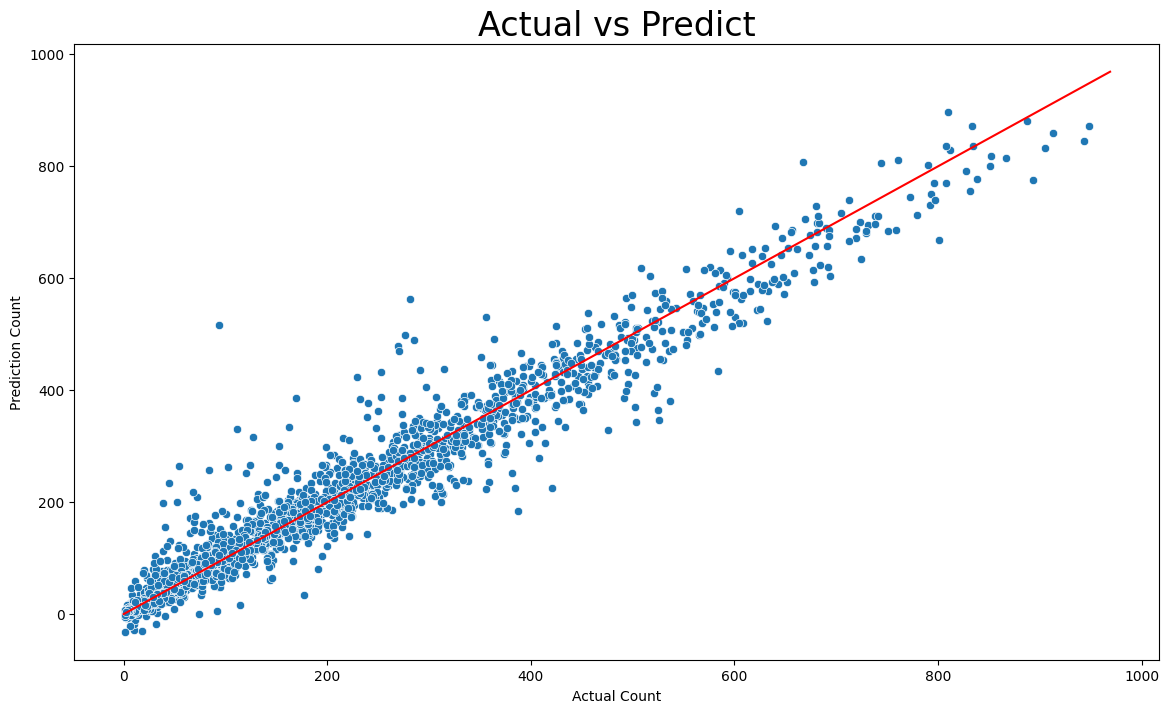

In [47]:
df_end = pd.DataFrame({'true':y_cnt_test,'pred':y_combine_pred})
df_end['e']= abs(df_end['true']-df_end['pred'])/df_end['true']
df_end.head()

plt.figure(figsize=(14,8))

sns.scatterplot(data=df_end,x='true',y='pred')
sns.lineplot(x=list(np.arange(0,970)),y= list(np.arange(0,970)),color='r')
plt.title('Actual vs Predict',fontsize=24)
plt.ylabel('Prediction Count')
plt.xlabel('Actual Count');

From this plot we see that we already making a good prediction. But, there's still some errors where the actual count is lower but the prediction that the model make is higher (overestimation) and vice versa (underestimation).<br>
With MAPE around 32%, we can category this model into '**reasonable forecasting** '(Lawrence et al. (2009) )

Next thing that we want to do is to find:
- How much data that overestimate and underestimate?
- Is there more Outlier in error above 20%?

In [48]:
residual = pd.DataFrame({"true":y_cnt_test,
                         'prediction':y_combine_pred,
                         'resid':y_cnt_test-y_combine_pred})

residual['resid%'] = abs(round(((residual['resid'])/residual['true'])*100,2))
residual.sort_values(by='resid%',ascending=False).head()


,true,prediction,resid,resid%
6194,1,-31.562778,32.562778,3256.28
10784,1,-6.033770,7.033770,703.38
7058,1,7.966227,-6.966227,696.62
7696,1,-5.929410,6.929410,692.94
8756,1,-5.068755,6.068755,606.88


Counting over estimate and under estimate for our data test. We found that our model is more overestimate

In [105]:
residual['type_est'] = np.where(residual['resid']<0,'under estimate','over estimate')
residual['type_est'].value_counts()

type_est
over estimate     1308
under estimate    1125
Name: count, dtype: int64

In [50]:
residual_feature = x_test.join(residual)
residual_feature

,hum,weathersit,holiday,season,atemp,temp,hr,year,month,day,day_W,day_Y,true,prediction,resid,resid%,type_est
7537,0.43,1,0,4,0.3333,0.36,12,2012,11,5,0,310,244,228.965915,15.034085,6.16,over estimate
44,0.61,1,0,3,0.6061,0.62,5,2011,6,25,5,176,14,3.797346,10.202654,72.88,over estimate
1246,0.76,1,0,2,0.3485,0.36,2,2011,4,14,3,104,3,2.694395,0.305605,10.19,over estimate
6482,0.58,1,0,3,0.7121,0.76,10,2012,7,19,3,201,198,203.500779,-5.500779,2.78,under estimate
3902,0.88,3,0,4,0.5303,0.56,6,2011,10,14,4,287,94,48.457344,45.542656,48.45,over estimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11594,0.48,1,0,4,0.2273,0.24,10,2012,11,25,6,330,139,213.197003,-74.197003,53.38,under estimate
3887,0.53,1,0,3,0.6212,0.64,0,2011,6,26,6,177,115,110.559201,4.440799,3.86,over estimate
11866,0.21,1,0,1,0.3030,0.32,13,2011,2,15,1,46,82,74.200859,7.799141,9.51,over estimate
4428,0.52,1,0,4,0.5000,0.52,20,2012,9,24,0,268,432,382.214517,49.785483,11.52,over estimate


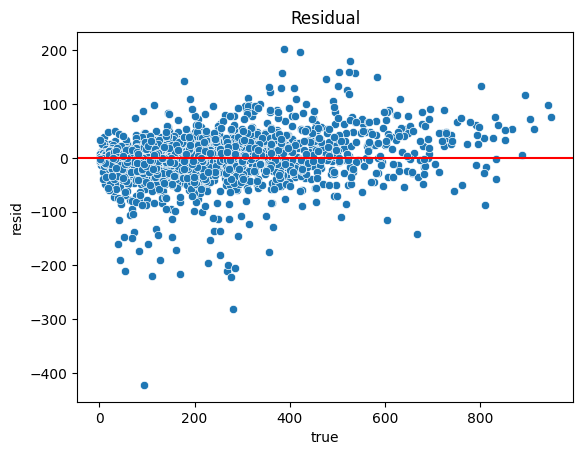

In [74]:
sns.scatterplot(x=residual_feature['true'],y=residual_feature['resid'])
plt.axhline(y=0,color='r')
plt.title('Residual');

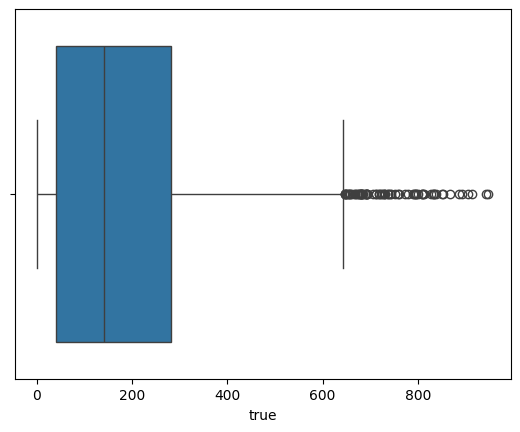

In [51]:
sns.boxplot(x=residual_feature['true']);

In [52]:
outlier = residual_feature['true'].quantile(.75)+(residual_feature['true'].quantile(.75)-residual_feature['true'].quantile(.25))*1.5

In [53]:
residual_feature['outlier'] = np.where(residual_feature['true']>outlier,'yes','no')

In [54]:
residual_feature[residual_feature['resid%']>20]['outlier'].value_counts()

outlier
no     871
yes      1
Name: count, dtype: int64

---

# Feature Importances

Now, the last but not least, we are gonna find every feature that influance the target `cnt`. But we are using XGB model to see feature importances.
We are gonna use:
- Feature Importances with sklearn library
- Feature Importance with shap library

### Feature Importances with sklearn library

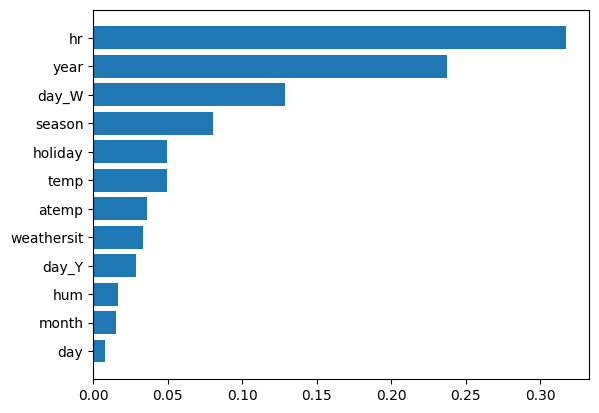

In [55]:
feature_imp = pd.Series(xgbTUNE['reg'].feature_importances_, kolom.get_feature_names_out()).sort_values(ascending = True).reset_index()

plt.barh(y= feature_imp['index'].str.replace('scale__',''),width=feature_imp[0]);
# feature_imp.plot(kind='barh', title='Feature Importances');

In here we found that `hr`,`year`, and `day_W` were features that really importan to `cnt`.<br>
*day_W = days in a week

### Feature Importance with shap library

After that, we also want to see which features that importance for our top 5 predictions (most count).
And we got that `hr`,`year`,and `temp` is the top 3 feature importances for our top 5 predictions.

In [56]:
import shap

In [57]:
preprocess = xgbTUNE.named_steps['trf']
model = xgbTUNE.named_steps['reg']

In [58]:
preprocess.fit(x_train)
x_train_pre = preprocess.transform(x_train)
reg = model.fit(x_train_pre,y_cnt_train)


 99%|===================| 9677/9732 [02:04<00:00]        

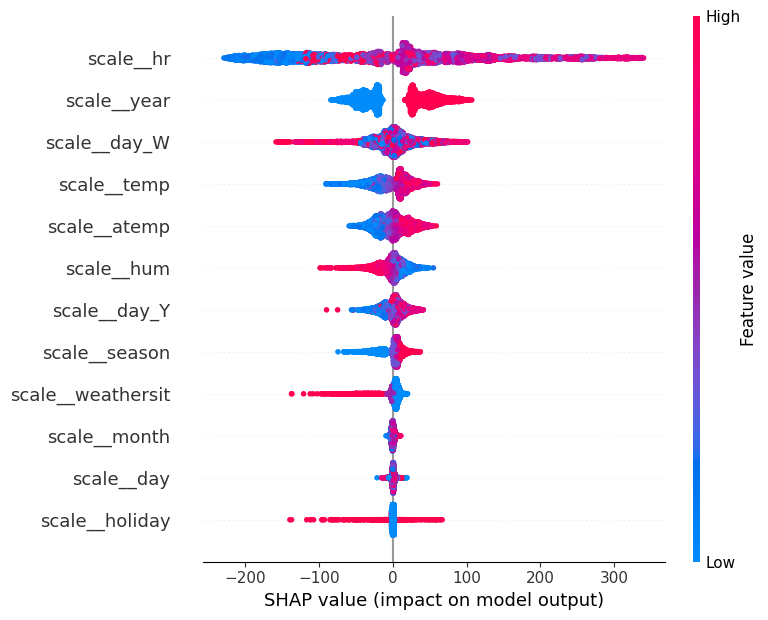

In [59]:
shap_values = shap.TreeExplainer(
    model,
    data=x_train_pre,
    model_output = 'raw'
).shap_values(x_train_pre)

shap.summary_plot(shap_values,x_train_pre,feature_names=preprocess.get_feature_names_out())

In [60]:
residual_feature_top_5 = residual_feature.sort_values('prediction',ascending=False).head()

In [61]:
feature_test = residual_feature_top_5.iloc[:,:12]
feature_test_pre = preprocess.transform(feature_test)
feature_name = preprocess.get_feature_names_out()

shap.initjs()
explainer = shap.TreeExplainer(xgbTUNE.named_steps['reg'])

shap_values_model = explainer.shap_values(feature_test_pre)

def shap_plot(j,model,feature,feature_name):

    shap.initjs()
    explainer = shap.TreeExplainer(model)
    shap_values_model = explainer.shap_values(feature)

    p=shap.force_plot(explainer.expected_value,shap_values_model[j],feature[j],feature_name)

    return p

In [62]:
shap_plot(0,xgbTUNE.named_steps['reg'],feature_test_pre,feature_name)

In [63]:
shap_plot(1,xgbTUNE.named_steps['reg'],feature_test_pre,feature_name)

In [64]:
shap_plot(2,xgbTUNE.named_steps['reg'],feature_test_pre,feature_name)

In [65]:
shap_plot(3,xgbTUNE.named_steps['reg'],feature_test_pre,feature_name)

In [66]:
shap_plot(4,xgbTUNE.named_steps['reg'],feature_test_pre,feature_name)

---

# Conclusion & Recommendation

In [67]:
score_stack_after_tunning

,MAE,MAPE,RMSE
StackingRegressor_combine,23.578488,0.325616,38.895082


In [68]:
df['cnt'].max()

970

In [69]:
score_stack_after_tunning

,MAE,MAPE,RMSE
StackingRegressor_combine,23.578488,0.325616,38.895082


With our metrics, from MAE, MAPE, and RMSE, if we see from standpoint of MAPE, we found out that our model having mean error absolute around ~23 rents bike and in percentage around 32% to predict the actual rent bike (With maximum rent bike count 970).<br>
With hour, year, and also day of week is the most feature that affect prediction of rent bike. And things to remember, this model is still using target that still skew that making the model having such errors.<br>
This Model is surely still can be improvised to make a better prediction. 

To improve model we might wanna do this:
1. We can adding more features that allign with target `cnt` such as bike type like size, payment, rental duration, and safety.
2. Adding more data that correspond or latest of that can improve this model.
3. While adding more data, we can use  model that are more complex, like recursive neural networks (rnn).


And to improve bussiness we might wanna do this:
1. Trying to have an amount of bike in the around maximum `cnt`. So there won't be understock / underestimate while also keeping the amount of bikes to not overstock it either. The company can save up to 32% by doing that.
2. Also keeping eyes around time above 10.am because there will be more users that will rent bikes.
3. And if there is longtitude and/or latitude data, we can add more station that located in strategist place that fit for future users.

---

# Saving Model

In [79]:
df.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt,year,month,day,day_W,day_Y
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250,2011,12,9,4,343
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18,2012,6,17,6,169
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107,2011,6,15,2,166
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145,2012,3,31,5,91
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857,2012,7,31,1,213


In [83]:
feature = df.drop(columns=['dteday','casual','registered','cnt'])

target_casual = df['casual']
target_registered = df['registered']
target_cnt = df['cnt']

In [81]:
import pickle

# Save model for casual
final_model_casual = stacks.fit(feature,target_casual)
pickle.dump(final_model_casual, open('model_casual-stackreg_BikeSharing.sav','wb'))

# Save model for registered
final_model_registered = stacks.fit(feature,target_registered)
pickle.dump(final_model_registered, open('model_registered-stackreg_BikeSharing.sav','wb'))

# **NOTE**

To FIND CNT we need to combine 2 model, 1 for casual and 1 for registered.<br>

So, `Y_prediction_cnt` = y_prediction_casual + y_prediction_registered

In [82]:
# Load Model for Casual and Registered

# mod_casual = pickle.load(open('model_casual-stackreg_BikeSharing.sav','rb'))
# mod_registered = pickle.load(open('model_registered-stackreg_BikeSharing.sav','rb'))

In [ ]:
# score_stack_after_tunning

,MAE,MAPE,RMSE
StackingRegressor_combine,23.578488,0.325616,38.895082


In [84]:
# Prediction for cnt with combine(casual+registered)

# mean_absolute_error(target_cnt,(mod_casual.predict(feature)+mod_registered.predict(feature)))

12.55807739995404